In [5]:
import numpy
import sys
sys.path.append("../")

from pathlib import Path

# Importing classification algorithm abstraction and components to parameterize it.
from pysatl_cpd.core.algorithms.knn_algorithm import KNNAlgorithm
# Importing test statistic.
from pysatl_cpd.core.algorithms.classification.test_statistics.threshold_overcome import ThresholdOvercome
# Importing one of the scrubber implementations.
from pysatl_cpd.core.scrubber.linear import LinearScrubber
from pysatl_cpd.core.scrubber.data_providers import LabeledDataProvider
from pysatl_cpd.labeled_data import LabeledCpdData
# Importing shell of CPD algorithm.
from pysatl_cpd.cpd_solver import CpdSolver
from pysatl_cpd.core.problem import CpdProblem
# Importing generator of dataset. 
from pysatl_cpd.generator.generator import ScipyDatasetGenerator
from pysatl_cpd.generator.saver import DatasetSaver

In [6]:
# Path to configuration of dataset that is going to be generated.
path_string = "./configs/test_config_exp.yml"
distributions_name = "exp"
numpy.random.seed(1)
saver = DatasetSaver(Path(), True)
# Generating datatset.
generated = ScipyDatasetGenerator().generate_datasets(Path(path_string), saver)
data, expected_change_points = generated[distributions_name]
print("Expected change points:", expected_change_points)

Expected change points: [200]


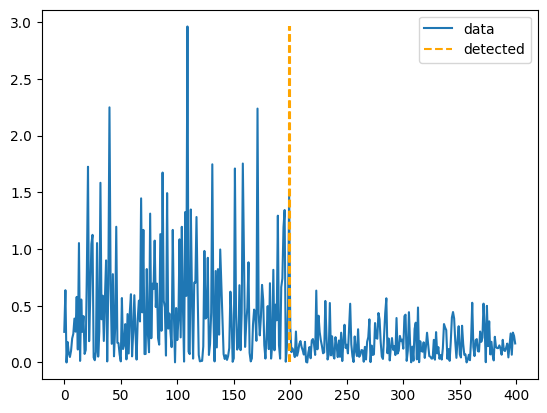

Located change points: (199;200)
Computation time (sec): 6.48


In [7]:
# Function for calculating distance between two observations in time series.
def metric(obs1: float, obs2: float) -> float:
    return abs(obs1 - obs2)


# Constants
# Number of neighbours for KNN classifier parameterization.
K = 7
# Threshold for statistic to overcome to be change point. Should be less than 1.
THRESHOLD = 4.0
# Size of sample that CPD algorithm considers at a time.
WINDOW_SIZE = 40
# Movement coefficient for calculating number of new elements for consideration each time the window moves forward.
SHIFT_FACTOR = 0.5
# Indentation from window borders not to consider points close to the borders of the window, because they are always change points.
# INDENT_COEFF = (1 - MOVEMENT_COEFF) / 2 
INDENT_COEFF = 0.25
# Limit of change points to be detected.
CHANGE_POINT_NUMBER = 40

# Creating instance of statistical criterion.
statistic = ThresholdOvercome(THRESHOLD)
# Creating instance of KNN based cpd algorithm.
knn_cpd = KNNAlgorithm(metric, statistic, INDENT_COEFF, K)
# Configuring scrubber
data_provider = LabeledDataProvider(LabeledCpdData(data,expected_change_points))
scrubber = LinearScrubber(data_provider, WINDOW_SIZE, SHIFT_FACTOR)
# Creating shell of CPD algorithm, parameterized by offline data and classification based CPD algorithm.
cpd = CpdSolver(CpdProblem(), algorithm=knn_cpd, algorithm_input=scrubber)

# Running CPD algorithm.
result = cpd.run()
# Making a plot, visualizing the input time series and the detected change points.
result.visualize(True)
print(result)